### Linear Regression Model
This notebook presents the training of a linear regression model using data obtained from four different text-to-video models on 35 different prompts. The model was trained using three customised metrics, namely, Naturalness Score, Text Similarity Score, and AP IoU score as features. The target column is represented by Human Score, which is the average of our human evaluation of all generated videos. The main objective of this notebook is to obtain weights for each of the metrics so that a weighted similarity score can be computed in the end.

In [1]:
import pandas as pd
df1 = pd.read_csv('/content/HE - Aphantasia .csv')
df2 = pd.read_csv('/content/HE - Text2Video Syn.csv')
df3 = pd.read_csv('/content/HE - Tune-a-Video.csv')
df4 = pd.read_csv('/content/HE - VideoCrafter.csv')
df5 = pd.read_csv('/content/HE - VideoFusion.csv')
merged_df = pd.concat([df1, df2, df3, df4, df5], axis=0)

In [24]:
merged_df.head()# drop columns 
df = merged_df.drop(['video_name', 'Blip_best_caption'], axis=1)
df.head()

,naturalness_score,text_similarity_score,Blip_best_caption,AP
0,0.487272,0.343287,a photo of a tropical forest covered in snow,0.00
1,0.500697,0.364922,an image of a colorful balloon in the air,0.04
2,0.203332,0.540834,a painting of two poodles playing in the water,0.00
3,0.226778,0.233499,a painting of a man and a woman running,0.00
4,0.449496,0.581176,a painting of a man riding a horse in the sunset,0.02


Model accuracy: 0.3351412104663305


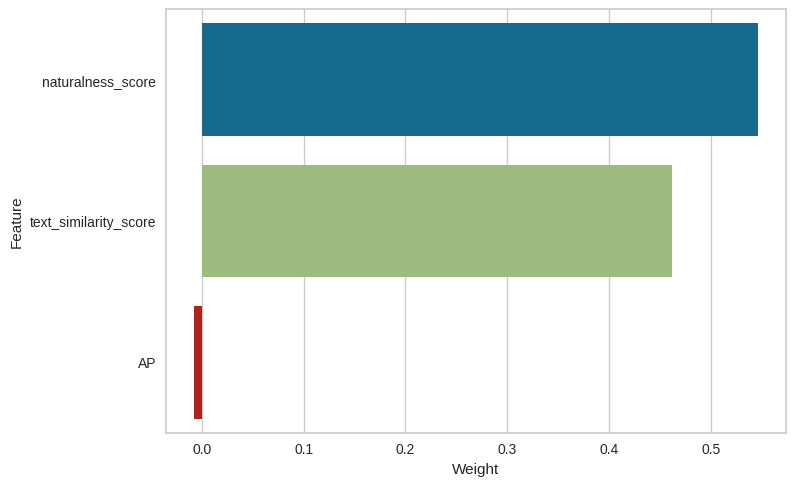

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Split your data into features and target
features = df.drop('Human Score', axis=1)
target = df[['Human Score']]

# Rescale the target column to min-max
scaler = MinMaxScaler()
target = scaler.fit_transform(target)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Choose and train your model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate your model
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print("Model accuracy:", score) # R2

# Get the feature weights
feature_weights = model.coef_[0]

# Rescale the feature weights so they add up to 1
feature_weights_rescaled = feature_weights / sum(feature_weights)

# Create a dataframe with feature names and rescaled weights
weights_df = pd.DataFrame({'Feature': X_train.columns, 'Weight': feature_weights_rescaled})

# Plot the rescaled feature weights
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Weight', y='Feature', data=weights_df)
plt.show()

In [22]:
feature_weights_rescaled

array([ 0.54584333,  0.46193088, -0.00777421])

These weights will be utilized to calculate the weighted average score for text-to-video evaluation for our customized metric.
Image Naturalness weight: 0.54584333
Text Similarity weight: 0.46193088
Ap AoI weight: -0.00777421

### Liner Regression Model Performance Plot

<Axes: >

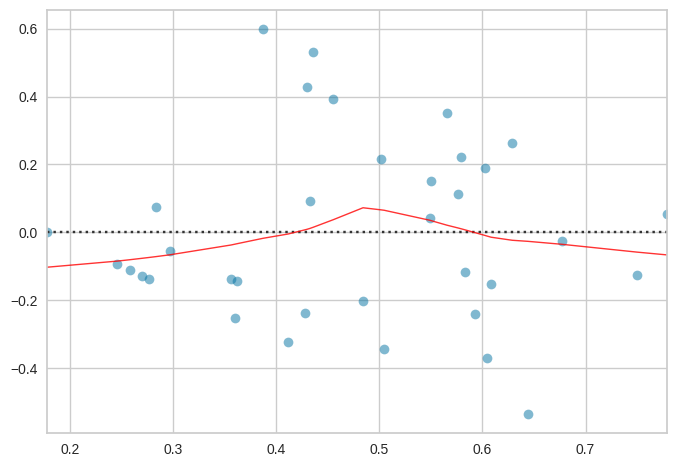

In [19]:
import seaborn as sns
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate residuals
residuals = y_test - y_pred
# Plot residuals vs predicted values
sns.residplot(x=y_pred, y=residuals, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})